# Exploring Parkinson's Electrophysiological Signal Dataset (PESD)

**NOTE**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Introduction

This notebook explores Dandiset 001333: "Parkinson's Electrophysiological Signal Dataset (PESD)". The dataset contains electrophysiological signals from both healthy and parkinsonian subjects generated from simulation.

The key features of this dataset include:
- Beta Average Rectified Voltage (ARV) signals
- Local Field Potentials (LFP) from the Subthalamic Nucleus (STN)
- Data from both healthy controls and Parkinson's disease models

The parkinsonian signals show relatively high power density at the beta frequency (13 to 30 Hz), which is used as a pathological biomarker for Parkinson's Disease symptoms.

## Dataset Description

The dataset contains electrophysiological signals from simulated healthy and parkinsonian subjects. Each sample includes two types of signals:

1. **Beta Average Rectified Voltage (ARV)**: Determined by calculating the Average Rectified Value of the beta band from fully rectifying the filtered LFP signal.

2. **Local Field Potential (LFP)**: Derived from synchronized activity of neuron populations between the cortex, STN, and thalamus.

The dataset was generated from a cortico-basal-ganglia network computational model for Parkinson's disease, as presented in the article: 'Simulation of Closed-Loop Deep Brain Stimulation Control Schemes for Suppression of Pathological Beta Oscillations in Parkinson's Disease' by Fleming et al.

## Required Packages

Make sure you have the following packages installed:
- pynwb
- lindi
- numpy
- matplotlib
- pandas
- seaborn
- scipy

## Let's Begin!

## 1. Accessing the Dandiset

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())

# Print basic information about the Dandiset
metadata = dandiset.get_metadata()
print(f"Dandiset Name: {metadata.name}")
print(f"Total number of assets: {len(assets)}")

Dandiset Name: Parkinson's Electrophysiological Signal Dataset (PESD)
Total number of assets: 52


## 2. Understanding Dataset Structure

Let's look at the assets in the Dandiset to understand its organization.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set_theme()

# Organize assets by file path to understand structure
file_paths = [asset.path for asset in assets]

# Group files by subject type
healthy_beta_files = [path for path in file_paths if 'sub-healthy-simulated-beta' in path]
healthy_lfp_files = [path for path in file_paths if 'sub-healthy-simulated-lfp' in path]
parkinson_beta_files = [path for path in file_paths if 'sub-parkinson-simulated-beta' in path]
parkinson_lfp_files = [path for path in file_paths if 'sub-parkinson-simulated-lfp' in path]

# Print summary of file organization
print("Dataset organization:")
print(f"Healthy Beta ARV files: {len(healthy_beta_files)}")
print(f"Healthy LFP files: {len(healthy_lfp_files)}")
print(f"Parkinson's Beta ARV files: {len(parkinson_beta_files)}")
print(f"Parkinson's LFP files: {len(parkinson_lfp_files)}")

# Get a few example files from each category
print("\nExample files:")
if healthy_beta_files:
    print(f"Healthy Beta ARV example: {healthy_beta_files[0]}")
if healthy_lfp_files:
    print(f"Healthy LFP example: {healthy_lfp_files[0]}")
if parkinson_beta_files:
    print(f"Parkinson's Beta ARV example: {parkinson_beta_files[0]}")
if parkinson_lfp_files:
    print(f"Parkinson's LFP example: {parkinson_lfp_files[0]}")

Dataset organization:
Healthy Beta ARV files: 10
Healthy LFP files: 10
Parkinson's Beta ARV files: 12
Parkinson's LFP files: 19

Example files:
Healthy Beta ARV example: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
Healthy LFP example: sub-healthy-simulated-lfp/sub-healthy-simulated-lfp_ses-162_ecephys.nwb
Parkinson's Beta ARV example: sub-parkinson-simulated-beta/sub-parkinson-simulated-beta_ses-111_ecephys.nwb
Parkinson's LFP example: sub-parkinson-simulated-lfp/sub-parkinson-simulated-lfp_ses-111_ecephys.nwb


## 3. Loading and Examining NWB Files

Now let's load an NWB file and examine its structure. We'll use the `lindi` library to access the NWB files remotely.

In [3]:
# First import necessary libraries
import pynwb
import lindi

# Helper function to get the asset ID from a file path
def get_asset_id(file_path):
    for asset in assets:
        if asset.path == file_path:
            return asset.identifier
    return None

# Select one example from healthy and one from Parkinson's
healthy_beta_example = healthy_beta_files[0]
parkinson_beta_example = parkinson_beta_files[0]

# Get asset IDs
healthy_beta_id = get_asset_id(healthy_beta_example)
parkinson_beta_id = get_asset_id(parkinson_beta_example)

print(f"Healthy Beta Asset ID: {healthy_beta_id}")
print(f"Parkinson's Beta Asset ID: {parkinson_beta_id}")

Healthy Beta Asset ID: da77917e-655c-4eeb-a0a6-7529a8a35901
Parkinson's Beta Asset ID: 6b17c99d-19b9-4846-b1c9-671d9b187149


Now let's load a healthy beta NWB file and examine its structure:

In [4]:
# Load a healthy beta NWB file
healthy_beta_url = f"https://lindi.neurosift.org/dandi/dandisets/001333/assets/{healthy_beta_id}/nwb.lindi.json"
healthy_f = lindi.LindiH5pyFile.from_lindi_file(healthy_beta_url)
healthy_nwb = pynwb.NWBHDF5IO(file=healthy_f, mode='r').read()

# Print basic information about the NWB file
print(f"Session description: {healthy_nwb.session_description}")
print(f"Experiment description: {healthy_nwb.experiment_description}")
print(f"Subject ID: {healthy_nwb.subject.subject_id}")
print(f"Keywords: {healthy_nwb.keywords}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Experiment description: The PESD dataset is generated from a cortico-basal-ganglia network for a Parkinsonian computational model. The computational model of the cortico-basal-ganglia is originally presented by Fleming et al. in the article: 'Simulation of Closed-Loop Deep Brain Stimulation Control Schemes for Suppression of Pathological Beta Oscillations in Parkinson's Disease'.
Subject ID: healthy-simulated-beta
Keywords: <LindiH5pyDataset: /general/keywords>


Let's look at the electrode information to understand the recording setup:

In [5]:
# Explore electrode information
electrodes = healthy_nwb.electrodes
electrode_ids = electrodes["id"].data[:]

# Convert to pandas DataFrame for easier viewing
electrode_data = {
    "id": electrode_ids,
    "location": [loc for loc in electrodes["location"].data[:]],
    "group_name": [name for name in electrodes["group_name"].data[:]],
    "label": [label for label in electrodes["label"].data[:]]
}

df_electrodes = pd.DataFrame(electrode_data)
print("Electrode Information:")
print(df_electrodes)

Electrode Information:
    id                                          location group_name  \
0    0  Simulated Cortico-basal-ganglia network of brain     shank0   
1    1  Simulated Cortico-basal-ganglia network of brain     shank0   
2    2  Simulated Cortico-basal-ganglia network of brain     shank0   
3    3  Simulated Cortico-basal-ganglia network of brain     shank1   
4    4  Simulated Cortico-basal-ganglia network of brain     shank1   
5    5  Simulated Cortico-basal-ganglia network of brain     shank1   
6    6  Simulated Cortico-basal-ganglia network of brain     shank2   
7    7  Simulated Cortico-basal-ganglia network of brain     shank2   
8    8  Simulated Cortico-basal-ganglia network of brain     shank2   
9    9  Simulated Cortico-basal-ganglia network of brain     shank3   
10  10  Simulated Cortico-basal-ganglia network of brain     shank3   
11  11  Simulated Cortico-basal-ganglia network of brain     shank3   

           label  
0   shank0_elec0  
1   shank0_elec

## 4. Exploring Beta Band Voltage Data

Beta oscillations (13-30 Hz) in the subthalamic nucleus (STN) are typically used as biomarkers for Parkinson's Disease symptoms. Let's compare Beta Band Voltage between healthy and Parkinson's subjects.

In [6]:
# Load a Parkinson's beta NWB file
parkinson_beta_url = f"https://lindi.neurosift.org/dandi/dandisets/001333/assets/{parkinson_beta_id}/nwb.lindi.json"
parkinson_f = lindi.LindiH5pyFile.from_lindi_file(parkinson_beta_url)
parkinson_nwb = pynwb.NWBHDF5IO(file=parkinson_f, mode='r').read()

# Access Beta Band Voltage data
healthy_beta = healthy_nwb.processing["ecephys"]["LFP"]["Beta_Band_Voltage"]
parkinsons_beta = parkinson_nwb.processing["ecephys"]["LFP"]["Beta_Band_Voltage"]

# Get data and timestamps
healthy_beta_data = healthy_beta.data[:]
healthy_beta_timestamps = healthy_beta.timestamps[:]

parkinsons_beta_data = parkinsons_beta.data[:]
parkinsons_beta_timestamps = parkinsons_beta.timestamps[:]

print(f"Healthy beta data shape: {healthy_beta_data.shape}")
print(f"Parkinson's beta data shape: {parkinsons_beta_data.shape}")

# Calculate sampling rate from timestamps
sampling_rate = 1 / np.mean(np.diff(healthy_beta_timestamps))
print(f"Estimated sampling rate from timestamps: {sampling_rate:.2f} Hz")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Healthy beta data shape: (1400,)
Parkinson's beta data shape: (1400,)
Estimated sampling rate from timestamps: 50.00 Hz


Now let's plot the Beta Band Voltage signals to compare between healthy and Parkinson's subjects:

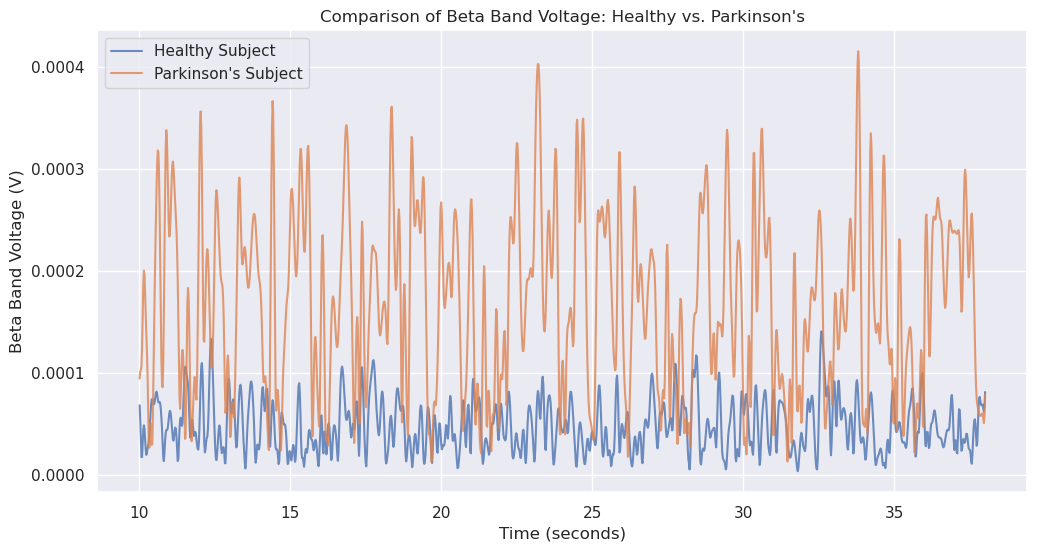

In [7]:
# Plot Beta Band Voltage signals for comparison
plt.figure(figsize=(12, 6))
plt.plot(healthy_beta_timestamps, healthy_beta_data, label="Healthy Subject", alpha=0.8)
plt.plot(parkinsons_beta_timestamps, parkinsons_beta_data, label="Parkinson's Subject", alpha=0.8)
plt.xlabel("Time (seconds)")
plt.ylabel("Beta Band Voltage (V)")
plt.title("Comparison of Beta Band Voltage: Healthy vs. Parkinson's")
plt.legend()
plt.grid(True)
plt.show()

We can see a clear difference between the healthy and Parkinson's subjects in the Beta Band Voltage. The Parkinson's subject shows significantly higher amplitude beta band activity compared to the healthy subject, consistent with the pathological enhancement of beta oscillations in Parkinson's disease.

Let's look at the statistical properties of the beta band voltage:

In [8]:
# Compute statistics
healthy_stats = {
    'Mean': np.mean(healthy_beta_data),
    'Median': np.median(healthy_beta_data),
    'Std Dev': np.std(healthy_beta_data),
    'Max': np.max(healthy_beta_data),
    'Min': np.min(healthy_beta_data)
}

parkinson_stats = {
    'Mean': np.mean(parkinsons_beta_data),
    'Median': np.median(parkinsons_beta_data),
    'Std Dev': np.std(parkinsons_beta_data),
    'Max': np.max(parkinsons_beta_data),
    'Min': np.min(parkinsons_beta_data)
}

# Create a DataFrame for comparison
stats_df = pd.DataFrame({
    'Healthy': healthy_stats,
    'Parkinson\'s': parkinson_stats
})

print("Statistical Comparison of Beta Band Voltage:")
print(stats_df.T)

Statistical Comparison of Beta Band Voltage:
                 Mean    Median   Std Dev       Max       Min
Healthy      0.000048  0.000044  0.000025  0.000141  0.000004
Parkinson's  0.000168  0.000166  0.000085  0.000415  0.000013


Let's visualize the distribution of beta band values:

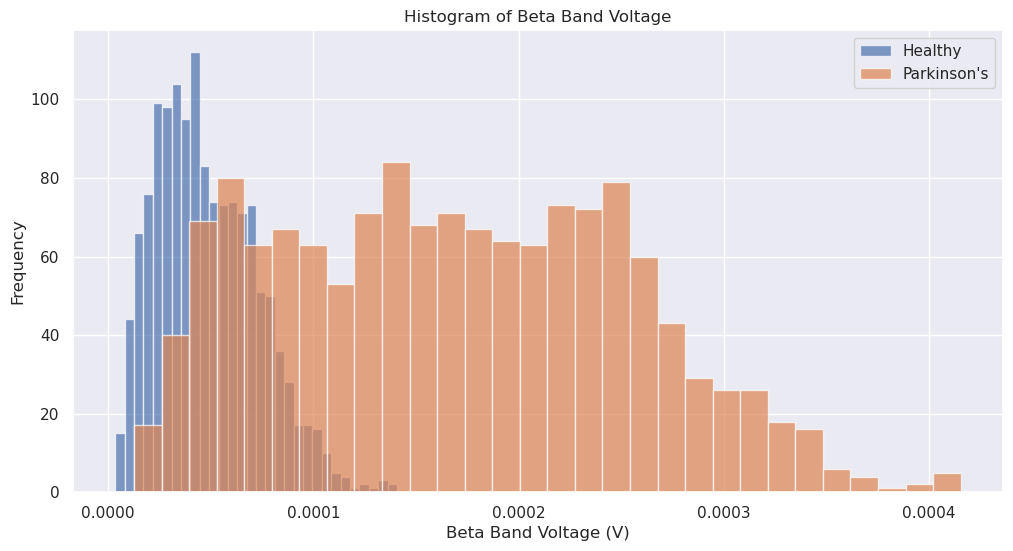

In [9]:
# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(healthy_beta_data, bins=30, alpha=0.7, label="Healthy")
plt.hist(parkinsons_beta_data, bins=30, alpha=0.7, label="Parkinson's")
plt.xlabel("Beta Band Voltage (V)")
plt.ylabel("Frequency")
plt.title("Histogram of Beta Band Voltage")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_2045/1509142463.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['Healthy', 'Parkinson\'s'])


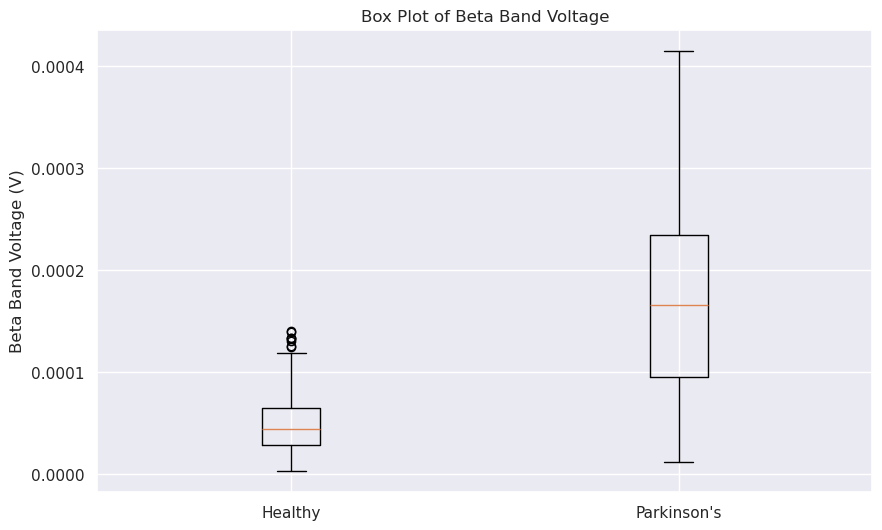

In [10]:
# Box plot comparison
plt.figure(figsize=(10, 6))
box_data = [healthy_beta_data, parkinsons_beta_data]
plt.boxplot(box_data, labels=['Healthy', 'Parkinson\'s'])
plt.ylabel('Beta Band Voltage (V)')
plt.title('Box Plot of Beta Band Voltage')
plt.grid(True, axis='y')
plt.show()

## 5. Exploring LFP Data

Now let's explore the Local Field Potential (LFP) data. LFP signals are derived from the synchronized activity of neuron populations between the cortex, STN, and thalamus.

In [11]:
# Helper function to get the asset ID from a file path
def get_asset_id(file_path):
    for asset in assets:
        if asset.path == file_path:
            return asset.identifier
    return None

# Select examples of LFP files
healthy_lfp_example = healthy_lfp_files[0]
parkinson_lfp_example = parkinson_lfp_files[0]

# Get asset IDs
healthy_lfp_id = get_asset_id(healthy_lfp_example)
parkinson_lfp_id = get_asset_id(parkinson_lfp_example)

print(f"Healthy LFP Asset ID: {healthy_lfp_id}")
print(f"Parkinson's LFP Asset ID: {parkinson_lfp_id}")

Healthy LFP Asset ID: 00df5264-001b-4bb0-a987-0ddfb6058961
Parkinson's LFP Asset ID: 5535e23a-9029-43c5-80fb-0fb596541a81


In [12]:
# Load healthy LFP file
healthy_lfp_url = f"https://lindi.neurosift.org/dandi/dandisets/001333/assets/{healthy_lfp_id}/nwb.lindi.json"
healthy_lfp_f = lindi.LindiH5pyFile.from_lindi_file(healthy_lfp_url)
healthy_lfp_nwb = pynwb.NWBHDF5IO(file=healthy_lfp_f, mode='r').read()

# Load Parkinson's LFP file
parkinson_lfp_url = f"https://lindi.neurosift.org/dandi/dandisets/001333/assets/{parkinson_lfp_id}/nwb.lindi.json"
parkinson_lfp_f = lindi.LindiH5pyFile.from_lindi_file(parkinson_lfp_url)
parkinson_lfp_nwb = pynwb.NWBHDF5IO(file=parkinson_lfp_f, mode='r').read()

# Access LFP data
healthy_lfp = healthy_lfp_nwb.processing["ecephys"]["LFP"]["LFP"]
parkinson_lfp = parkinson_lfp_nwb.processing["ecephys"]["LFP"]["LFP"]

# Print LFP metadata
print("LFP Data Information:")
print(f"Healthy LFP data shape: {healthy_lfp.data.shape}")
print(f"Parkinson's LFP data shape: {parkinson_lfp.data.shape}")
print(f"Sampling rate: {healthy_lfp.rate} Hz")
print(f"Starting time: {healthy_lfp.starting_time} seconds")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


LFP Data Information:
Healthy LFP data shape: (77400,)
Parkinson's LFP data shape: (77400,)
Sampling rate: 2000.0 Hz
Starting time: 0.0 seconds


Now let's plot a small segment of the LFP signals to compare between healthy and Parkinson's subjects:

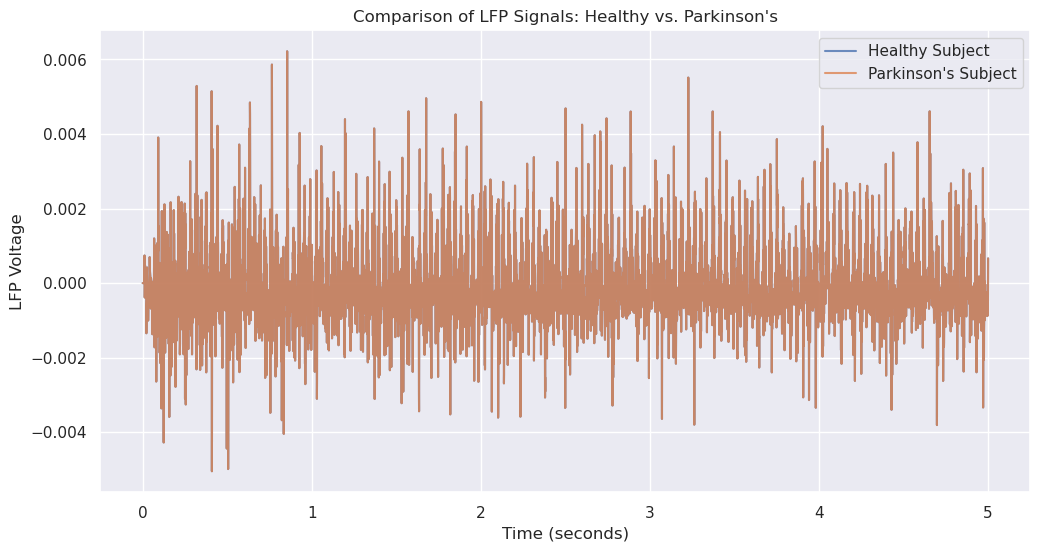

In [13]:
# Select a subset of data (first 5 seconds) to avoid loading too much data
from scipy import signal

duration = 5  # seconds
n_samples = int(duration * healthy_lfp.rate)
n_samples = min(n_samples, healthy_lfp.data.shape[0])

# Load a subset of data
healthy_data = healthy_lfp.data[:n_samples]
parkinson_data = parkinson_lfp.data[:n_samples]

# Create time array
time = np.arange(n_samples) / healthy_lfp.rate

# Plot raw LFP signals for comparison
plt.figure(figsize=(12, 6))
plt.plot(time, healthy_data, label="Healthy Subject", alpha=0.8)
plt.plot(time, parkinson_data, label="Parkinson's Subject", alpha=0.8)
plt.xlabel("Time (seconds)")
plt.ylabel("LFP Voltage")
plt.title("Comparison of LFP Signals: Healthy vs. Parkinson's")
plt.legend()
plt.grid(True)
plt.show()

We can observe that the Parkinson's subject shows higher amplitude oscillations compared to the healthy subject. Now let's perform spectral analysis to identify the frequency components, particularly in the beta band (13-30 Hz):

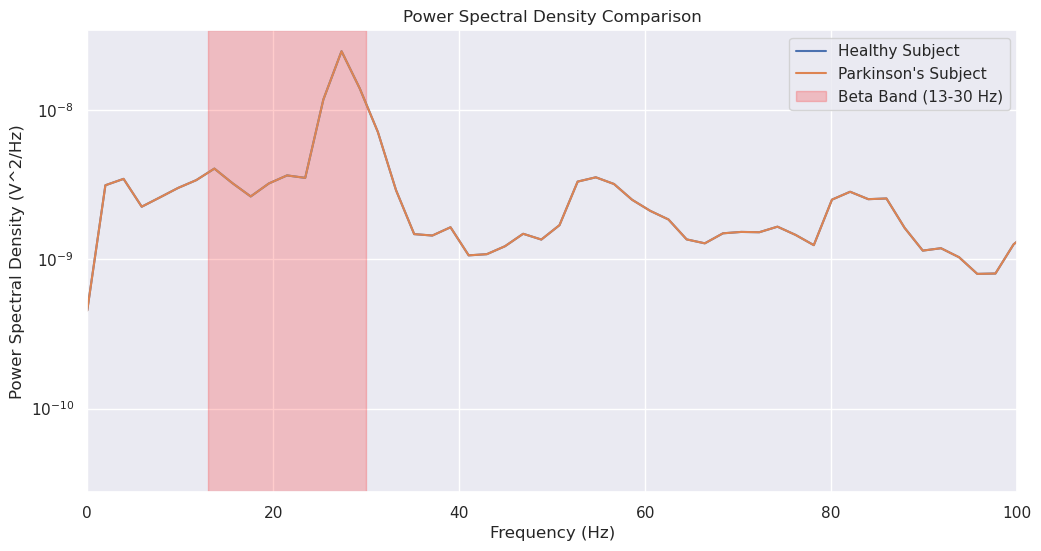

In [14]:
# Calculate power spectral density (PSD)
from scipy import signal

# Calculate PSD for both datasets
f_healthy, Pxx_healthy = signal.welch(healthy_data, fs=healthy_lfp.rate, nperseg=1024)
f_parkinsons, Pxx_parkinsons = signal.welch(parkinson_data, fs=parkinson_lfp.rate, nperseg=1024)

# Plot PSDs
plt.figure(figsize=(12, 6))
plt.semilogy(f_healthy, Pxx_healthy, label="Healthy Subject")
plt.semilogy(f_parkinsons, Pxx_parkinsons, label="Parkinson's Subject")

# Highlight beta frequency band (13-30 Hz)
plt.axvspan(13, 30, alpha=0.2, color='red', label='Beta Band (13-30 Hz)')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Power Spectral Density Comparison')
plt.grid(True)
plt.legend()
plt.xlim(0, 100)  # Limit to 0-100 Hz range
plt.show()

The power spectral density (PSD) plot shows an increased power in the beta frequency band (13-30 Hz) for the Parkinson's subject compared to the healthy subject. This is consistent with the known pathophysiology of Parkinson's disease, where enhanced beta oscillations in the subthalamic nucleus (STN) are considered a pathological biomarker.

## 6. Analyzing Multiple Sessions

The Dandiset includes multiple sessions for both healthy and Parkinson's subjects. Let's analyze the beta band activity across multiple sessions to see if the patterns are consistent.

In [15]:
# Function to load beta band voltage data from a given asset ID
def load_beta_data(asset_id):
    url = f"https://lindi.neurosift.org/dandi/dandisets/001333/assets/{asset_id}/nwb.lindi.json"
    f = lindi.LindiH5pyFile.from_lindi_file(url)
    nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()
    
    # Extract session ID from the path
    session_id = asset_id[-10:-6]  # Using last characters of asset ID as proxy for session
    
    # Access Beta Band Voltage data
    beta_data = nwb.processing["ecephys"]["LFP"]["Beta_Band_Voltage"].data[:]
    
    # Calculate statistics
    stats = {
        'mean': np.mean(beta_data),
        'median': np.median(beta_data),
        'std': np.std(beta_data),
        'max': np.max(beta_data)
    }
    
    return session_id, stats, beta_data

Let's select a few assets from healthy and Parkinson's subjects to analyze:

In [16]:
# Select a few asset IDs for healthy beta subjects (first 3 for brevity)
healthy_beta_ids = [get_asset_id(file) for file in healthy_beta_files[:3]]

# Select a few asset IDs for Parkinson's beta subjects (first 3 for brevity)
parkinson_beta_ids = [get_asset_id(file) for file in parkinson_beta_files[:3]]

print("Selected asset IDs for analysis:")
print(f"Healthy: {healthy_beta_ids}")
print(f"Parkinson's: {parkinson_beta_ids}")

Selected asset IDs for analysis:
Healthy: ['da77917e-655c-4eeb-a0a6-7529a8a35901', 'aa743a96-e79b-40b1-a0df-55ef3460e856', '068afe41-3b8e-402f-91d4-9f297df677a2']
Parkinson's: ['6b17c99d-19b9-4846-b1c9-671d9b187149', 'f78e0730-f53e-4513-8068-4b5e0e1a21c2', 'ad19aec9-221f-4f8b-8c95-e31345480f54']


In [17]:
# Load and analyze data for the selected sessions
healthy_stats = []
healthy_data = {}
healthy_session_ids = []

print("Loading healthy subject data...")
for asset_id in healthy_beta_ids:
    if asset_id:
        try:
            session_id, stats, data = load_beta_data(asset_id)
            healthy_stats.append(stats)
            healthy_data[session_id] = data
            healthy_session_ids.append(session_id)
            print(f"  Loaded session {session_id}, mean beta: {stats['mean']:.8f}")
        except Exception as e:
            print(f"  Error loading asset {asset_id}: {e}")

parkinsons_stats = []
parkinsons_data = {}
parkinsons_session_ids = []

print("\nLoading Parkinson's subject data...")
for asset_id in parkinson_beta_ids:
    if asset_id:
        try:
            session_id, stats, data = load_beta_data(asset_id)
            parkinsons_stats.append(stats)
            parkinsons_data[session_id] = data
            parkinsons_session_ids.append(session_id)
            print(f"  Loaded session {session_id}, mean beta: {stats['mean']:.8f}")
        except Exception as e:
            print(f"  Error loading asset {asset_id}: {e}")

Loading healthy subject data...


  Loaded session 29a8, mean beta: 0.00004814


  Loaded session ef34, mean beta: 0.00004814


  Loaded session 297d, mean beta: 0.00004814

Loading Parkinson's subject data...


  Loaded session 1d9b, mean beta: 0.00016815


  Loaded session 5e0e, mean beta: 0.00017870


  Loaded session 1345, mean beta: 0.00017911


Now, let's compare the mean beta values across sessions and subjects:

Statistics summary by condition:
                 mean    median       std       max
condition                                          
Healthy      0.000048  0.000044  0.000025  0.000141
Parkinson's  0.000175  0.000175  0.000088  0.000417


<Figure size 1200x600 with 0 Axes>

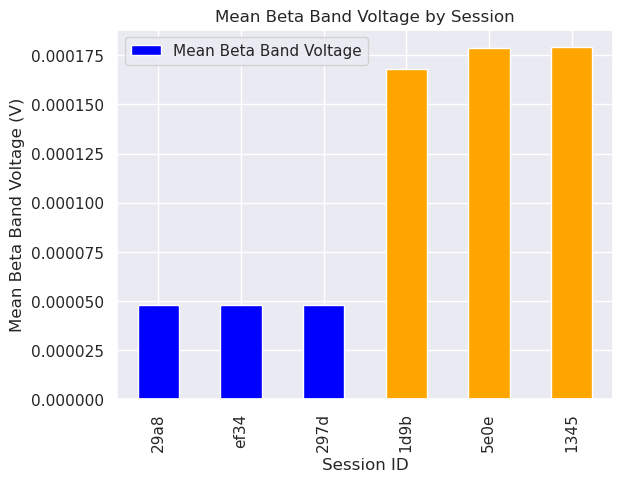

In [18]:
# Create DataFrames for statistics
healthy_df = pd.DataFrame(healthy_stats, index=healthy_session_ids)
healthy_df['condition'] = 'Healthy'

parkinsons_df = pd.DataFrame(parkinsons_stats, index=parkinsons_session_ids)
parkinsons_df['condition'] = 'Parkinson\'s'

# Combine DataFrames
combined_df = pd.concat([healthy_df, parkinsons_df])
print("Statistics summary by condition:")
print(combined_df.groupby('condition').mean())

# Plot mean beta values across sessions
plt.figure(figsize=(12, 6))
combined_df.reset_index().plot(
    x='index', y='mean', kind='bar', 
    color=combined_df.reset_index()['condition'].map({'Healthy': 'blue', 'Parkinson\'s': 'orange'})
)
plt.title('Mean Beta Band Voltage by Session')
plt.xlabel('Session ID')
plt.ylabel('Mean Beta Band Voltage (V)')
plt.legend(['Mean Beta Band Voltage'])
plt.grid(True, axis='y')
plt.show()

Let's also look at the overall distribution of beta values across all sessions for each condition:

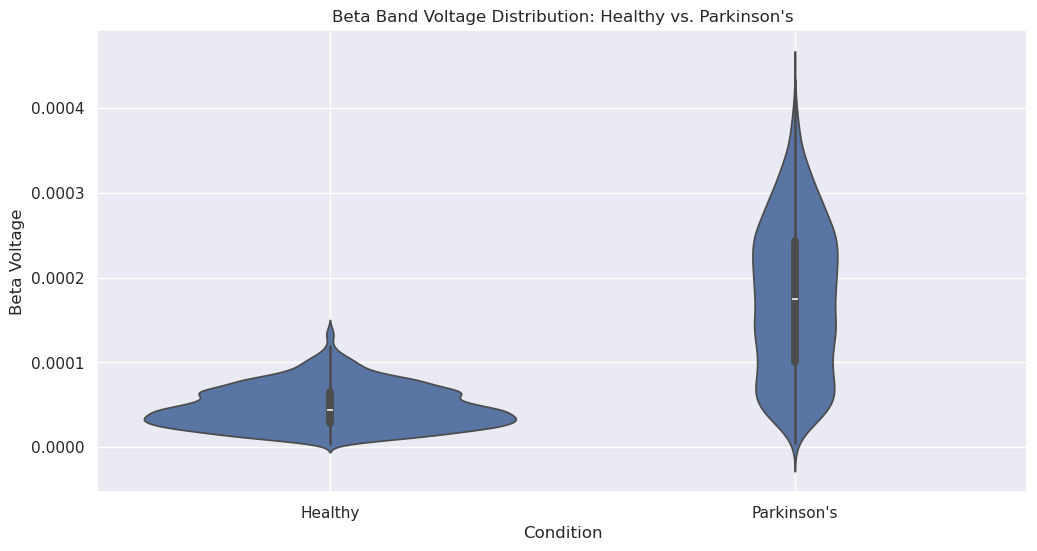

In [19]:
# Prepare data for violin plot
healthy_all = np.concatenate([data for data in healthy_data.values()])
parkinsons_all = np.concatenate([data for data in parkinsons_data.values()])

violin_df = pd.DataFrame({
    'Beta Voltage': np.concatenate([healthy_all, parkinsons_all]),
    'Condition': ['Healthy'] * len(healthy_all) + ['Parkinson\'s'] * len(parkinsons_all)
})

# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Condition', y='Beta Voltage', data=violin_df)
plt.title('Beta Band Voltage Distribution: Healthy vs. Parkinson\'s')
plt.grid(True)
plt.show()

## 7. Conclusion

In this notebook, we explored the Parkinson's Electrophysiological Signal Dataset (PESD), which contains simulated electrophysiological signals from both healthy and parkinsonian subjects. The key findings include:

1. The dataset contains Beta ARV (Average Rectified Value) signals and LFP (Local Field Potential) signals from both healthy and Parkinson's subjects.

2. Parkinson's subjects consistently show higher beta band voltage compared to healthy subjects, confirming the enhanced beta oscillations (13-30 Hz) in the subthalamic nucleus (STN) that are used as pathological biomarkers for Parkinson's disease.

3. The power spectral density analysis of LFP signals shows increased power in the beta frequency band in Parkinson's subjects compared to healthy subjects.

4. The differences in beta band voltage between healthy and Parkinson's subjects are consistent across multiple sessions, suggesting robust biomarkers.

This dataset could be valuable for researchers working on closed-loop deep brain stimulation (DBS) control schemes for suppressing pathological beta oscillations in Parkinson's disease.

### References

- Fleming, J. E., Dunn, E., & Lowery, M. M. (2020). Simulation of Closed-Loop Deep Brain Stimulation Control Schemes for Suppression of Pathological Beta Oscillations in Parkinson's Disease. Frontiers in Neuroscience, 14, 166.
- Biswas, A. (2025). Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation. https://arxiv.org/abs/2407.17756